#Proyecto final - Clasificación de espectros Mössbauer
Curso Modelado de datos con redes neuronales

Daniel Henao

In [13]:
import tensorflow as tf
import tensorflow.keras as kr
import numpy as np
import matplotlib.pyplot as plt
import random

El objetivo de este proyecto es utilizar una red neuronal para clasificar espectros Mössbauer según correspondan a la hematita, magnetita o a otro material.

Se empieza importando 149 espectros Mössbauer descargados de una base de datos de la universidad Mount Holyoke (ahora el enlace está caído y no sé si la base está en otra dirección). Cada espectro está en un archivo de texto con 512 valores de velocidad e intensidad.

In [ ]:
from google.colab import files
hematita = files.upload()

In [ ]:
magnetita = files.upload()

In [ ]:
otros = files.upload()

Se organizan los archivos en listas, extrayendo de cada categoría 10 espectros aleatorios para conformar el conjunto de validación. Se elaboran también las listas con las etiquetas de los espectros. Los espectros de hematita se etiquetan con el número 1, los de magnetita con el 2 y la categoría Otros con el 0.

In [36]:
train_hem = []
train_mag = []
train_otr = []
train_y_hem = []
train_y_mag = []
train_y_otr = []

for espectro in hematita.keys():
  spec = -np.loadtxt(espectro, dtype=float)[:,1] / 10 # Normalizacion incluida
  train_hem.append(spec.tolist())
  train_y_hem.append(1)

for espectro in magnetita.keys():
  spec = -np.loadtxt(espectro, dtype=float)[:,1] / 10
  train_mag.append(spec.tolist())
  train_y_mag.append(2)

for espectro in otros.keys():
  spec = -np.loadtxt(espectro, dtype=float)[:,1] / 10
  train_otr.append(spec.tolist())
  train_y_otr.append(0)

# Se revuelven las listas aleatoriamente para escoger el conjunto de validacion
random.shuffle(train_hem)
random.shuffle(train_mag)
random.shuffle(train_otr)

dev_set = train_hem[0:10] + train_mag[0:10] + train_otr[0:10]
del train_hem[0:10], train_mag[0:10], train_otr[0:10]
del train_y_hem[0:10], train_y_mag[0:10], train_y_otr[0:10]
train_y = train_y_hem + train_y_mag + train_y_otr
dev_y = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

train_set = train_hem + train_mag + train_otr

In [37]:
train_y_one = tf.one_hot(train_y, depth=3).numpy().tolist()
dev_y_one = tf.one_hot(dev_y, depth=3).numpy().tolist()

Ahora se genera una red neuronal convencional de 3 capas, contando con 6, 4 y 3 neuronas de la primera a la última, respectivamente. El valor del *learning rate* se ajustó según se notaba una mejor precisión en el conjunto de entrenamiento y en el de validación.

In [38]:
lr = 0.0006
nn = [6, 4, 3]  # numero de neuronas por capa.

model = kr.Sequential()

l1 = model.add(kr.layers.Dense(nn[0], activation='relu', kernel_regularizer=kr.regularizers.l2(), input_shape=(512,)))
l2 = model.add(kr.layers.Dense(nn[1], activation='relu', kernel_regularizer=kr.regularizers.l2()))
l3 = model.add(kr.layers.Dense(nn[2], activation='softmax', kernel_regularizer=kr.regularizers.l2()))

model.compile(loss='categorical_crossentropy', optimizer=kr.optimizers.Adam(lr), metrics=['acc'])

In [39]:
history = model.fit(train_set, train_y_one, epochs=150, shuffle=True, validation_data = (dev_set, dev_y_one))

Epoch 1/150
4/4 [==============================] - 1s 93ms/step - loss: 1.2920 - acc: 0.2941 - val_loss: 1.2811 - val_acc: 0.3000
Epoch 2/150
4/4 [==============================] - 0s 15ms/step - loss: 1.2641 - acc: 0.4538 - val_loss: 1.2603 - val_acc: 0.4000
Epoch 3/150
4/4 [==============================] - 0s 15ms/step - loss: 1.2432 - acc: 0.5042 - val_loss: 1.2383 - val_acc: 0.5667
Epoch 4/150
4/4 [==============================] - 0s 15ms/step - loss: 1.2220 - acc: 0.5630 - val_loss: 1.2181 - val_acc: 0.7000
Epoch 5/150
4/4 [==============================] - 0s 15ms/step - loss: 1.2019 - acc: 0.6471 - val_loss: 1.1953 - val_acc: 0.7333
Epoch 6/150
4/4 [==============================] - 0s 15ms/step - loss: 1.1821 - acc: 0.6387 - val_loss: 1.1744 - val_acc: 0.7333
Epoch 7/150
4/4 [==============================] - 0s 16ms/step - loss: 1.1623 - acc: 0.6555 - val_loss: 1.1536 - val_acc: 0.7667
Epoch 8/150
4/4 [==============================] - 0s 15ms/step - loss: 1.1435 - acc: 0.68

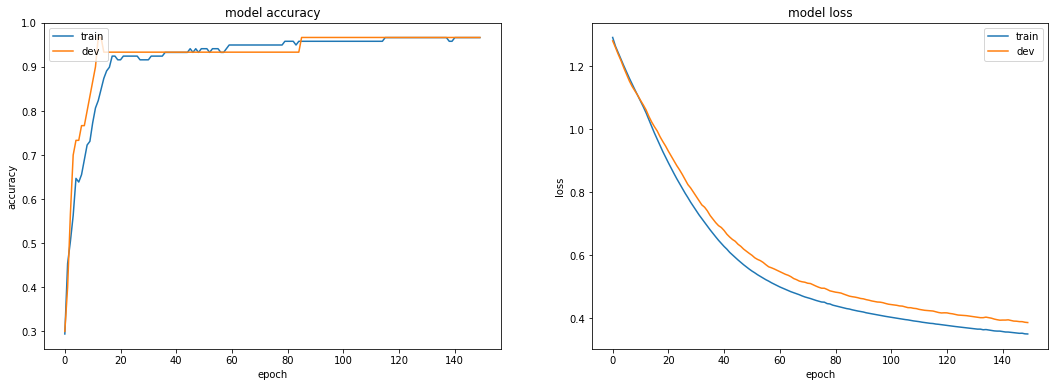

In [40]:
plt.figure(figsize=(18,6))

plt.subplot(121)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'dev'], loc='upper left')

plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'dev'])
plt.show()

La red fue generada y puesta a prueba varias veces, variando cada vez aleatoriamente los espectros del conjunto de validación. El comportamiento conseguido fue similar, se llegó siempre a una precisión mayor del 90% en ambos conjuntos de datos, casi todas las veces siendo la precisión sobre el conjunto de validación muy cercana a la de entrenamiento, solo algunas veces la precisión sobre validación fue un poco mayor que entrenamiento. Las curvas de la función de error tienen el aspecto de un buen *learning rate* según lo consultado en la web.

In [63]:
hem1 = np.loadtxt('Hematita 1.txt', dtype=float)
x_hem1 = hem1[:,0]
y_hem1 = hem1[:,1]

hem2 = np.loadtxt('Hematita 2.txt', dtype=float)
x_hem2 = hem2[:,0]
y_hem2 = hem2[:,1]

hem3 = np.loadtxt('Hematita 5.txt', dtype=float)
x_hem3 = hem3[:,0]
y_hem3 = hem3[:,1]

mag1 = np.loadtxt('Magnetita 1.txt', dtype=float)
x_mag1 = mag1[:,0]
y_mag1 = mag1[:,1]

mag2 = np.loadtxt('Magnetita 2.txt', dtype=float)
x_mag2 = mag2[:,0]
y_mag2 = mag2[:,1]

mag3 = np.loadtxt('Magnetita 3.txt', dtype=float)
x_mag3 = mag3[:,0]
y_mag3 = mag3[:,1]

otr1 = np.loadtxt('Alluaudite.txt', dtype=float)
x_otr1 = otr1[:,0]
y_otr1 = otr1[:,1]

otr2 = np.loadtxt('Wolfeite.txt', dtype=float)
x_otr2 = otr2[:,0]
y_otr2 = otr2[:,1]

otr3 = np.loadtxt('Laueite.txt', dtype=float)
x_otr3 = otr3[:,0]
y_otr3 = otr3[:,1]

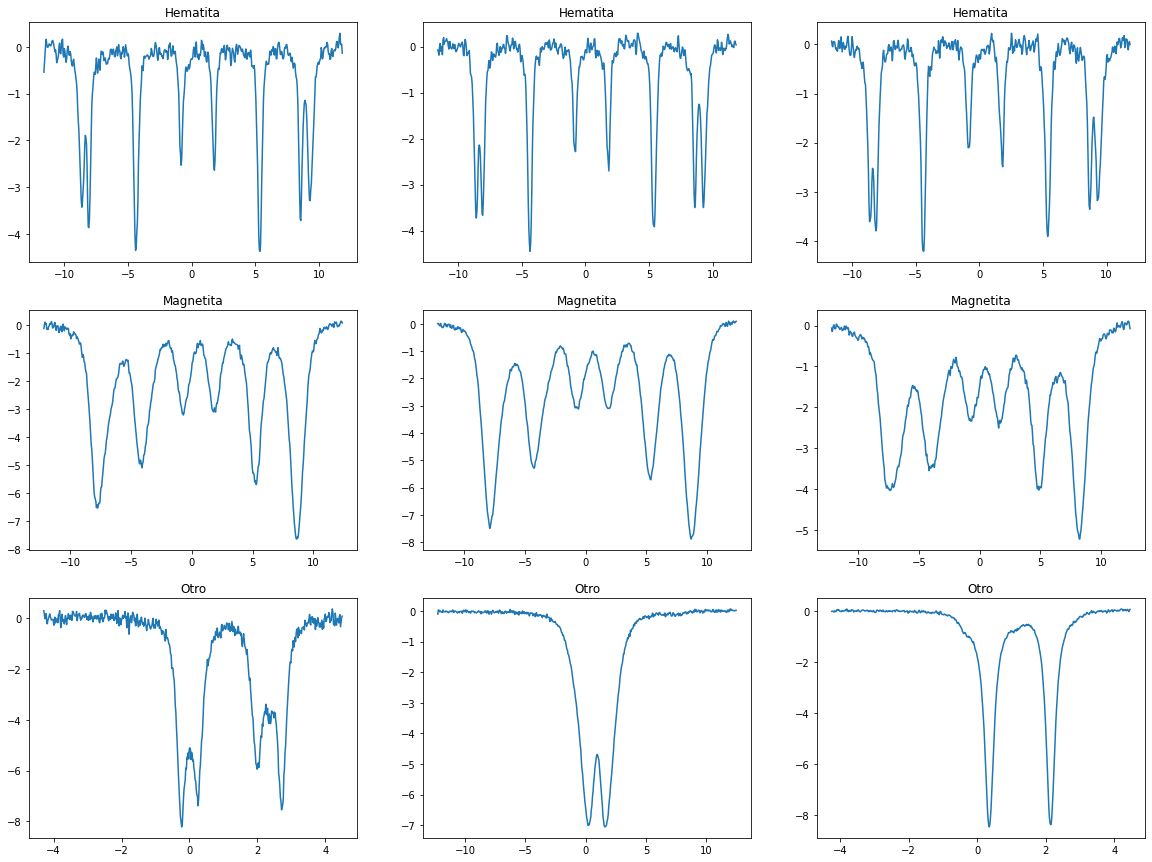

In [64]:
plt.figure(figsize=(20,15))
plt.subplot(331)
plt.plot(x_hem1, y_hem1)
plt.title('Hematita')

plt.subplot(332)
plt.plot(x_hem2, y_hem2)
plt.title('Hematita')

plt.subplot(333)
plt.plot(x_hem3, y_hem3)
plt.title('Hematita')

plt.subplot(334)
plt.plot(x_mag1, y_mag1)
plt.title('Magnetita')

plt.subplot(335)
plt.plot(x_mag2, y_mag2)
plt.title('Magnetita')

plt.subplot(336)
plt.plot(x_mag3, y_mag3)
plt.title('Magnetita')

plt.subplot(337)
plt.plot(x_otr1, y_otr1)
plt.title('Otro')

plt.subplot(338)
plt.plot(x_otr2, y_otr2)
plt.title('Otro')

plt.subplot(339)
plt.plot(x_otr3, y_otr3)
plt.title('Otro')

plt.show()

Aquí se muestran 3 espectros de cada una de las categorías. Claramente las formas de las 3 categorías se pueden diferenciar a simple vista y esto ha ayudado a la red a alcanzar una gran precisión en la clasificación. Pero quiero destacar que aún existiendo grandes diferencias entre espectros de la categoría Otros, pues en esta entran espectros de cualquier otro material, la red ha logrado distinguirlos a casi todos de las primeras dos.